<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#BigQuery---Quick-Reference" data-toc-modified-id="BigQuery---Quick-Reference-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>BigQuery - Quick Reference</a></span><ul class="toc-item"><li><span><a href="#Import-Packages" data-toc-modified-id="Import-Packages-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import Packages</a></span></li><li><span><a href="#Client-Setup*" data-toc-modified-id="Client-Setup*-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Client Setup*</a></span></li><li><span><a href="#Dataset" data-toc-modified-id="Dataset-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Dataset</a></span></li><li><span><a href="#Tables-in-Dataset" data-toc-modified-id="Tables-in-Dataset-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Tables in Dataset</a></span></li><li><span><a href="#Big-Query-Table" data-toc-modified-id="Big-Query-Table-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Big Query Table</a></span></li><li><span><a href="#Queries" data-toc-modified-id="Queries-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Queries</a></span><ul class="toc-item"><li><span><a href="#Subset" data-toc-modified-id="Subset-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Subset</a></span><ul class="toc-item"><li><span><a href="#Results" data-toc-modified-id="Results-1.6.1.1"><span class="toc-item-num">1.6.1.1&nbsp;&nbsp;</span>Results</a></span></li></ul></li></ul></li><li><span><a href="#Dry-Run-BigQuery" data-toc-modified-id="Dry-Run-BigQuery-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Dry Run BigQuery</a></span></li><li><span><a href="#SELECT,-FROM,-and-WHERE" data-toc-modified-id="SELECT,-FROM,-and-WHERE-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>SELECT, FROM, and WHERE</a></span></li><li><span><a href="#GROUP-BY,-HAVING-and-COUNT()" data-toc-modified-id="GROUP-BY,-HAVING-and-COUNT()-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>GROUP BY, HAVING and COUNT()</a></span></li><li><span><a href="#ORDER-BY" data-toc-modified-id="ORDER-BY-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>ORDER BY</a></span></li><li><span><a href="#AS,WITH" data-toc-modified-id="AS,WITH-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>AS,WITH</a></span></li><li><span><a href="#Join" data-toc-modified-id="Join-1.12"><span class="toc-item-num">1.12&nbsp;&nbsp;</span>Join</a></span><ul class="toc-item"><li><span><a href="#Others" data-toc-modified-id="Others-1.12.1"><span class="toc-item-num">1.12.1&nbsp;&nbsp;</span>Others</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-1.13"><span class="toc-item-num">1.13&nbsp;&nbsp;</span>References</a></span></li></ul></li></ul></div>

# BigQuery - Quick Reference

## Import Packages

In [1]:
# Big Query
from google.cloud import bigquery

# Pandas
import numpy as np
import pandas as pd
#import pandas_gbq

# Others


## Client Setup*

In [2]:
# Create a "Client" object
client = bigquery.Client()

Using Kaggle's public dataset BigQuery integration.


## Dataset

In [3]:
# Construct a reference to the "hacker_news" dataset
dataset_ref = client.dataset("hacker_news", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

In [4]:
# Dataset reference
print(type(dataset_ref))

# Dataset type
print(type(dataset))

<class 'google.cloud.bigquery.dataset.DatasetReference'>
<class 'google.cloud.bigquery.dataset.Dataset'>


> ## Tables in Dataset

In [5]:
# List all the tables in the "hacker_news" dataset
tables = list(client.list_tables(dataset))

# Print names of all tables in the dataset (there are four!)
for table in tables:  
    print(table.table_id)

comments
full
full_201510
stories


## Big Query Table

In [6]:
# Construct a reference to the "full" table
table_ref = dataset.table("full")

# API request - fetch the table
bg_full = client.get_table(table_ref)

In [7]:
type(bg_full)

google.cloud.bigquery.table.Table

In [8]:
# Print information on all the columns in the "full" table in the "hacker_news" dataset
bg_full.schema

[SchemaField('by', 'STRING', 'NULLABLE', "The username of the item's author.", ()),
 SchemaField('score', 'INTEGER', 'NULLABLE', 'Story score', ()),
 SchemaField('time', 'INTEGER', 'NULLABLE', 'Unix time', ()),
 SchemaField('timestamp', 'TIMESTAMP', 'NULLABLE', 'Timestamp for the unix time', ()),
 SchemaField('title', 'STRING', 'NULLABLE', 'Story title', ()),
 SchemaField('type', 'STRING', 'NULLABLE', 'Type of details (comment, comment_ranking, poll, story, job, pollopt)', ()),
 SchemaField('url', 'STRING', 'NULLABLE', 'Story url', ()),
 SchemaField('text', 'STRING', 'NULLABLE', 'Story or comment text', ()),
 SchemaField('parent', 'INTEGER', 'NULLABLE', 'Parent comment ID', ()),
 SchemaField('deleted', 'BOOLEAN', 'NULLABLE', 'Is deleted?', ()),
 SchemaField('dead', 'BOOLEAN', 'NULLABLE', 'Is dead?', ()),
 SchemaField('descendants', 'INTEGER', 'NULLABLE', 'Number of story or poll descendants', ()),
 SchemaField('id', 'INTEGER', 'NULLABLE', "The item's unique id.", ()),
 SchemaField('ran

In [9]:
[command for command in dir(bg_full) if not command.startswith('_')]

['clustering_fields',
 'created',
 'dataset_id',
 'description',
 'encryption_configuration',
 'etag',
 'expires',
 'external_data_configuration',
 'friendly_name',
 'from_api_repr',
 'from_string',
 'full_table_id',
 'labels',
 'location',
 'modified',
 'num_bytes',
 'num_rows',
 'partition_expiration',
 'partitioning_type',
 'path',
 'project',
 'reference',
 'schema',
 'self_link',
 'streaming_buffer',
 'table_id',
 'table_type',
 'time_partitioning',
 'to_api_repr',
 'to_bqstorage',
 'view_query',
 'view_use_legacy_sql']

## Queries

### Subset

In [10]:
schema_subset = [col for col in bg_full.schema if col.name in ('by', 'title', 'time')]
schema_subset

[SchemaField('by', 'STRING', 'NULLABLE', "The username of the item's author.", ()),
 SchemaField('time', 'INTEGER', 'NULLABLE', 'Unix time', ()),
 SchemaField('title', 'STRING', 'NULLABLE', 'Story title', ())]

#### Results

In [11]:
results = [x for x in client.list_rows(bg_full, start_index=100, selected_fields=schema_subset, max_results=10)]
print(results)

[Row(('krapp', 1537179942, ''), {'by': 0, 'time': 1, 'title': 2}), Row(('jack-r-abbit', 1366222272, ''), {'by': 0, 'time': 1, 'title': 2}), Row(('zakum1', 1535446142, ''), {'by': 0, 'time': 1, 'title': 2}), Row(('hirsin', 1475132077, ''), {'by': 0, 'time': 1, 'title': 2}), Row(('sitharus', 1515031514, ''), {'by': 0, 'time': 1, 'title': 2}), Row(('konart', 1490287712, ''), {'by': 0, 'time': 1, 'title': 2}), Row(('CogitoCogito', 1531428780, ''), {'by': 0, 'time': 1, 'title': 2}), Row(('piyush_soni', 1425406735, ''), {'by': 0, 'time': 1, 'title': 2}), Row(('pnathan', 1386472621, ''), {'by': 0, 'time': 1, 'title': 2}), Row(('icebraining', 1329908786, ''), {'by': 0, 'time': 1, 'title': 2})]


In [12]:
for i in results:
    print(dict(i))

{'by': 'krapp', 'time': 1537179942, 'title': ''}
{'by': 'jack-r-abbit', 'time': 1366222272, 'title': ''}
{'by': 'zakum1', 'time': 1535446142, 'title': ''}
{'by': 'hirsin', 'time': 1475132077, 'title': ''}
{'by': 'sitharus', 'time': 1515031514, 'title': ''}
{'by': 'konart', 'time': 1490287712, 'title': ''}
{'by': 'CogitoCogito', 'time': 1531428780, 'title': ''}
{'by': 'piyush_soni', 'time': 1425406735, 'title': ''}
{'by': 'pnathan', 'time': 1386472621, 'title': ''}
{'by': 'icebraining', 'time': 1329908786, 'title': ''}


## Dry Run BigQuery

In [13]:
# Table size in GB
BYTES_PER_GB = 2**30
bg_full.num_bytes / BYTES_PER_GB

7.673015536740422

In [14]:
# Function to estimate the query size in GB
def estimate_gigabytes_scanned(query, bq_client):
    # see https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs#configuration.dryRun
    my_job_config = bigquery.job.QueryJobConfig()
    my_job_config.dry_run = True
    my_job = bq_client.query(query, job_config=my_job_config)
    BYTES_PER_GB = 2**30
    return(my_job.total_bytes_processed / BYTES_PER_GB)

In [15]:
estimate_gigabytes_scanned("SELECT Id FROM `bigquery-public-data.hacker_news.stories`", client)

0.01460171490907669

## SELECT, FROM, and WHERE

In [16]:
query1 = """SELECT parent, COUNT(id) FROM `bigquery-public-data.hacker_news.comments`
        limit = 1000
        """

## GROUP BY, HAVING and COUNT()

In [17]:
query1 = """
                SELECT parent, COUNT(id) AS NumPosts
                FROM `bigquery-public-data.hacker_news.comments`
                GROUP BY parent
                HAVING COUNT(id) > 10
                """

In [18]:
estimate_gigabytes_scanned(query1, client)

0.1251610666513443

In [19]:
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query1, job_config=safe_config)

In [20]:
# API request - run the query, and convert the results to a pandas DataFrame
popular_comments = query_job.to_dataframe()

In [21]:
# Print the first 3 rows of the DataFrame
popular_comments.head(3)

,parent,NumPosts
0,801208,56
1,5463210,55
2,6455391,67


In [22]:
type(popular_comments)

pandas.core.frame.DataFrame

## ORDER BY

In [23]:
query2 = """
                SELECT parent, COUNT(id) AS NumPosts
                FROM `bigquery-public-data.hacker_news.comments`
                GROUP BY parent
                HAVING COUNT(id) > 10
                ORDER BY(parent)
                """

In [24]:
estimate_gigabytes_scanned(query2, client)

0.1251610666513443

In [25]:
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query2, job_config=safe_config)

In [26]:
# API request - run the query, and convert the results to a pandas DataFrame
popular_comments_order = query_job.to_dataframe()

In [27]:
# Print the first 3 rows of the DataFrame
popular_comments_order.head(3)

,parent,NumPosts
0,189,20
1,227,18
2,363,1311


## AS,WITH

In [28]:
query3 = """
                WITH comment_order AS
                (SELECT parent, COUNT(id) AS NumPosts
                FROM `bigquery-public-data.hacker_news.comments`
                GROUP BY parent
                HAVING COUNT(id) > 10
                ORDER BY(parent))
                SELECT Max(parent) FROM comment_order
                """

In [29]:
estimate_gigabytes_scanned(query3, client)

0.1251610666513443

## Join

In [30]:
query4 = """
        SELECT L.license, COUNT(1) AS number_of_files
        FROM `bigquery-public-data.github_repos.sample_files` AS sf
        INNER JOIN `bigquery-public-data.github_repos.licenses` AS L 
            ON sf.repo_name = L.repo_name
        GROUP BY L.license
        ORDER BY number_of_files DESC
        """

In [31]:
estimate_gigabytes_scanned(query4, client)

1.691054169088602

In [32]:
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query4, job_config=safe_config)

In [33]:
# API request - run the query, and convert the results to a pandas DataFrame
file_count_by_license = query_job.to_dataframe()

In [34]:
file_count_by_license.head(3)

,license,number_of_files
0,mit,20623729
1,gpl-2.0,17115755
2,apache-2.0,7229730


### Others

In [35]:
# Using WHERE reduces the amount of data scanned / quota used
query = """
SELECT *
FROM `bigquery-public-data.hacker_news.stories`
WHERE REGEXP_CONTAINS(title, r"(k|K)aggle")
ORDER BY time
"""

query_job = client.query(query)

iterator = query_job.result(timeout=30)
rows = list(iterator)

# Transform the rows into a nice pandas dataframe
headlines = pd.DataFrame(data=[list(x.values()) for x in rows], columns=list(rows[0].keys()))

# Look at the first 10 headlines
headlines.head(10)

,id,by,score,time,time_ts,title,url,text,deleted,dead,descendants,author
0,1302611,bravura,17,1272486671,2010-04-28 20:31:11+00:00,Kaggle: Data mining competitions,http://kaggle.com/,,None,None,2.0,bravura
1,1712126,cavedave,2,1285067033,2010-09-21 11:03:53+00:00,Ask kaggle founder questions.,http://www.reddit.com/r/MachineLearning/commen...,,None,None,0.0,cavedave
2,1777074,agconway,1,1286718095,2010-10-10 13:41:35+00:00,R package recommendaiton engine contest now li...,http://kaggle.com/R,,None,None,0.0,agconway
3,1837791,datageek,3,1288168347,2010-10-27 08:32:27+00:00,"Data prediction competition site, Kaggle, gets...",http://kaggle.com,"According to the new site ""Crowdsourcing data ...",None,None,0.0,datageek
4,2072839,coderdude,22,1294266803,2011-01-05 22:33:23+00:00,Kaggle - Improving data analysis algorithms by...,http://www.kaggle.com/,,None,None,4.0,coderdude
5,2111700,ntoshev,2,1295257090,2011-01-17 09:38:10+00:00,Kaggle Social Network Challenge (Inferring Fri...,http://www.kaggle.com/index.php?option=com_ccb...,,None,None,0.0,ntoshev
6,2305136,ssclafani,19,1299685115,2011-03-09 15:38:35+00:00,Link Prediction by De-anonymization: Winning t...,http://33bits.org/2011/03/09/link-prediction-b...,None,None,None,0.0,ssclafani
7,2463890,TalGalili,5,1303241544,2011-04-19 19:32:24+00:00,How Kaggle competitors use R,http://www.r-bloggers.com/how-kaggle-competito...,,None,None,0.0,TalGalili
8,2465871,antgoldbloom,1,1303290526,2011-04-20 09:08:46+00:00,Revolution Analytics Offers Free Software for ...,http://www.readwriteweb.com/hack/2011/04/revol...,None,None,None,0.0,antgoldbloom
9,2731365,antgoldbloom,21,1309896818,2011-07-05 20:13:38+00:00,Kaggle contest aims to boost Wikipedia editors,http://www.newscientist.com/blogs/onepercent/2...,,None,None,2.0,antgoldbloom


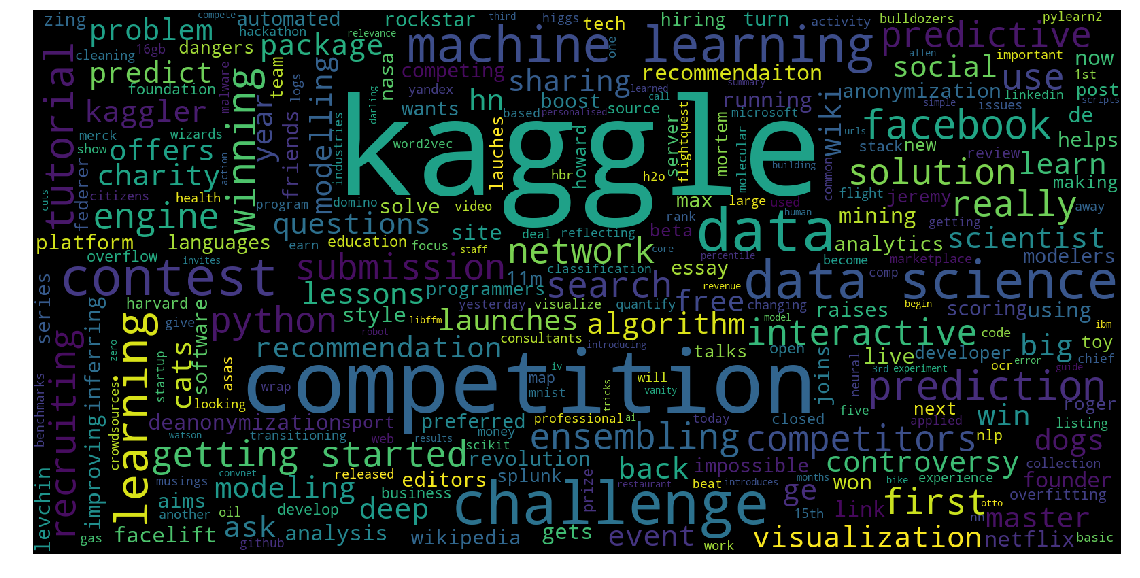

In [36]:
import wordcloud
import matplotlib.pyplot as plt

words = ' '.join(headlines.title).lower()
cloud = wordcloud.WordCloud(background_color='black',
                            max_font_size=200,
                            width=1600,
                            height=800,
                            max_words=300,
                            relative_scaling=.5).generate(words)
plt.figure(figsize=(20,10))
plt.axis('off')
plt.savefig('kaggle-hackernews.png')
plt.imshow(cloud)
plt.show()

## References

* [Exploring the BigQuery API](http://www.kaggle.com/sohier/beyond-queries-exploring-the-bigquery-api/)
* [BigQuery Syntax](https://cloud.google.com/bigquery/docs/reference/standard-sql/query-syntax)
* [BigQuery best practices](https://cloud.google.com/bigquery/docs/best-practices-costs)
* [Kaggle BigQuery Datasets](https://www.kaggle.com/datasets?fileType=bigQuery)
* [Kaggle Course on BigQuery ](https://www.kaggle.com/learn/intro-to-sql)
* [Kaggle Summmer Camp on BigQuery](https://www.youtube.com/watch?v=jYQoQfFzJRw&list=PLqFaTIg4myu9neIs_wfWzgeOkKbiImXB6)